In [50]:
#essential imports
import pandas as pd
import numpy as np
import json
from pandas.io.json import json_normalize

#plotting imports
%matplotlib inline
import matplotlib.pyplot as plt

#date
import datetime as dt

# Loading Data

In [51]:
deaths = pd.read_csv('DATA/deaths.csv', low_memory=False)
deaths.head()

,Name,Birth Date,Death Date,Description,Actor,Author,Musician
0,Jack Weston,1924,1996-05-03,", american actor",True,False,False
1,John Beradino,1917,1996-05-19,", american baseball player and actor",True,False,False
2,Jon Pertwee,1919,1996-05-20,", british actor",True,False,False
3,Lash LaRue,1917,1996-05-21,", american actor",True,False,False
4,Paul Delph,1957,1996-05-21,", american musician and producer",False,False,True


In [123]:
print(len(deaths))

1314


# Computing the jobs distributions

In [52]:
def proportion(df,job):
    return len(df[df[job]==True].index)/len(df.index)

In [53]:
job_distribution = pd.DataFrame(index=['dead artists jobs distributions'])
job_distribution['actors'] = proportion(deaths,'Actor')
job_distribution['authors'] = proportion(deaths,'Author')
job_distribution['musicians'] = proportion(deaths,'Musician')

In [54]:
job_distribution.head()

,actors,authors,musicians
dead artists jobs distributions,0.48554,0.266362,0.322679


array([<matplotlib.axes._subplots.AxesSubplot object at 0x11e4cabe0>], dtype=object)

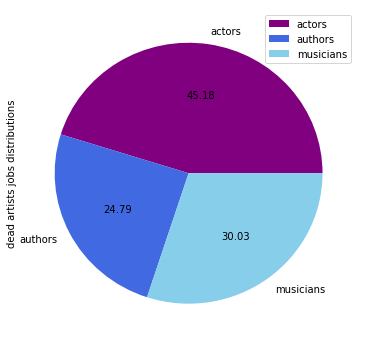

In [175]:
job_distribution.transpose().plot.pie(subplots=True, colors=['purple', 'royalblue', 'skyblue'], autopct='%.2f',figsize=[6,6])

# Distribution of dates: age at death and death date 

## Age at death for all categories

In [56]:
def clear_date(df, date_name):
    dout = df.drop(date_name,axis=1)
    dout[date_name] = pd.to_datetime(df[date_name]).map(lambda x: x.year)
    return dout

deaths_dates = clear_date(deaths, 'Death Date')[['Name','Birth Date','Death Date']]

In [57]:
deaths_dates.head()

,Name,Birth Date,Death Date
0,Jack Weston,1924,1996
1,John Beradino,1917,1996
2,Jon Pertwee,1919,1996
3,Lash LaRue,1917,1996
4,Paul Delph,1957,1996


In [58]:
def compute_age(birth, death):
    age = []
    for idx in range(0,len(birth)):
        age.append(death[idx]-birth[idx])
    return age

deaths_dates['Age at death'] = compute_age(np.array(deaths_dates['Birth Date']), np.array(deaths_dates['Death Date']))

In [59]:
deaths_dates.head()

,Name,Birth Date,Death Date,Age at death
0,Jack Weston,1924,1996,72
1,John Beradino,1917,1996,79
2,Jon Pertwee,1919,1996,77
3,Lash LaRue,1917,1996,79
4,Paul Delph,1957,1996,39


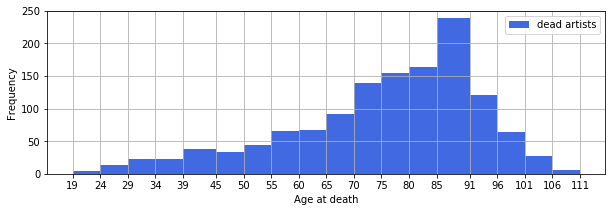

In [148]:
bins = np.round(np.linspace(np.min(deaths_dates['Age at death']),np.max(deaths_dates['Age at death']),19))
ax = (deaths_dates[['Name','Age at death']].set_index('Name').rename(columns={'Age at death':'dead artists'})
                .plot(kind='hist',orientation='vertical',facecolor='royalblue',bins=bins,figsize=(10,3), grid=True))
ax.set_xlabel('Age at death')
ax.xaxis.set_ticks(bins)

## Death date for all categories

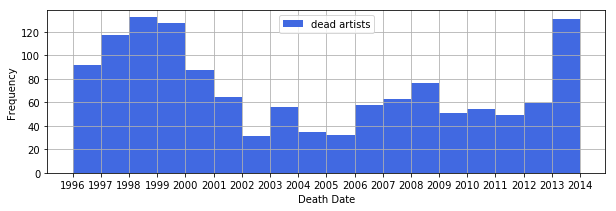

In [152]:
bins = np.round(np.linspace(1996,2014,19))
ax = (deaths_dates[['Name','Death Date']].set_index('Name').rename(columns={'Death Date':'dead artists'})
                .plot(kind='hist',orientation='vertical',facecolor='royalblue',figsize=(10,3),bins=bins, grid=True))
ax.set_xlabel('Death Date')
ax.xaxis.set_ticks(bins)

# Per category analysis

## Death date

In [155]:
actors_dist = deaths_dates[deaths['Actor']==True]
musicians_dist = deaths_dates[deaths['Author']==True]
authors_dist = deaths_dates[deaths['Musician']==True]

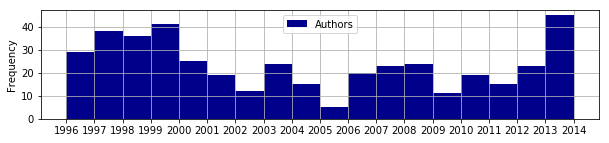

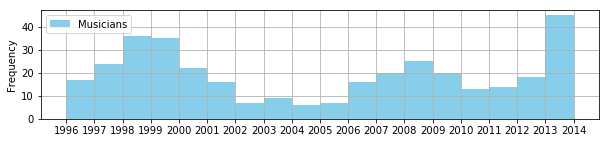

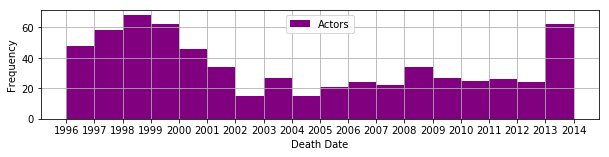

In [173]:
bins = np.round(np.linspace(1996,2014,19))
ax = (authors_dist[['Name','Death Date']].set_index('Name').rename(columns={'Death Date':'Authors'})
                .plot(kind='hist',orientation='vertical',facecolor='darkblue',figsize=(10,2),bins=bins, grid=True))
#ax.set_xlabel('Death Date')
ax.xaxis.set_ticks(bins)

ax2 = (musicians_dist[['Name','Death Date']].set_index('Name').rename(columns={'Death Date':'Musicians'})
                .plot(kind='hist',orientation='vertical',facecolor='skyblue',figsize=(10,2),bins=bins, grid=True))
#ax2.set_xlabel('Death Date')
ax2.xaxis.set_ticks(bins)

ax3 = (actors_dist[['Name','Death Date']].set_index('Name').rename(columns={'Death Date':'Actors'})
                .plot(kind='hist',orientation='vertical',facecolor='purple',figsize=(10,2),bins=bins, grid=True))
ax3.set_xlabel('Death Date')
ax3.xaxis.set_ticks(bins)

## Age distribution per category

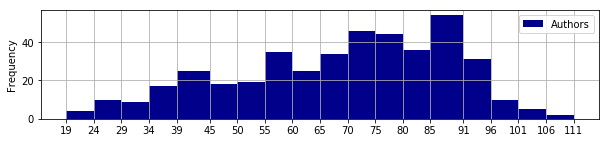

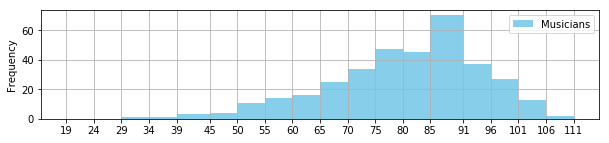

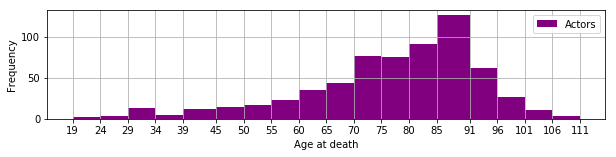

In [174]:
bins = np.round(np.linspace(np.min(deaths_dates['Age at death']),np.max(deaths_dates['Age at death']),19))
ax = (authors_dist[['Name','Age at death']].set_index('Name').rename(columns={'Age at death':'Authors'})
                .plot(kind='hist',orientation='vertical',facecolor='darkblue',bins=bins,figsize=(10,2), grid=True))
#ax.set_xlabel('Age at death')
ax.xaxis.set_ticks(bins)

ax = (musicians_dist[['Name','Age at death']].set_index('Name').rename(columns={'Age at death':'Musicians'})
                .plot(kind='hist',orientation='vertical',facecolor='skyblue',bins=bins,figsize=(10,2), grid=True))
#ax.set_xlabel('Age at death')
ax.xaxis.set_ticks(bins)

ax = (actors_dist[['Name','Age at death']].set_index('Name').rename(columns={'Age at death':'Actors'})
                .plot(kind='hist',orientation='vertical',facecolor='purple',bins=bins,figsize=(10,2), grid=True))
ax.set_xlabel('Age at death')
ax.xaxis.set_ticks(bins)